# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)  

output_data_file

'output_data/cities.csv'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# weather_url
units = "imperial" 


#get from doc &q
# query_url = f"(url+ appid =(weather_api_key)&units=(unit)&q="
# query_url

query_url = f"{url}appid={weather_api_key}&units={units}&q="

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=6d987dcb0699091a9eee0d01a310631b&units=imperial&q=


In [4]:

# city_response = requests.get(query_url + city)
# city_json = city_response.json()
# city_json = requests.get(query_url + "&q=" + city).json()

# city_json = city_response.json()
# print(city_json)

In [5]:
#lists to hold data needed for plots
city_name = []
lon = []
lat = []
temp = []
humidity = []
clouds = []
wind = []

# set up retrieval of data from json
#i nclude a print log of each city as it'sbeing processed (with the city number and city name).
 
city_number = 1

for city in cities:
    
    final_url = query_url + city
#         
    response = requests.get(final_url).json()
                            
    try: 
        
# #       
        city_name.append(response['name'])     
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        
        print(f" Processing... {city_number} | {city}")        
        city_number = city_number + 1
                            
    except:
        
# #         print(f" Processing... {city_number} | {city}")
         print(f" Incomplete Info ... Next Record.")
         city_number += 1 

#         print(response)

 Processing... 1 | new norfolk
 Incomplete Info ... Next Record.
 Processing... 3 | busselton
 Processing... 4 | cabo san lucas
 Processing... 5 | goodings grove
 Processing... 6 | atuona
 Processing... 7 | ribeira grande
 Processing... 8 | saskylakh
 Processing... 9 | port alfred
 Processing... 10 | nikolskoye
 Processing... 11 | diego de almagro
 Processing... 12 | hobart
 Processing... 13 | puerto ayora
 Processing... 14 | salinopolis
 Processing... 15 | taft
 Processing... 16 | panarukan
 Incomplete Info ... Next Record.
 Incomplete Info ... Next Record.
 Processing... 19 | mount gambier
 Processing... 20 | ushuaia
 Processing... 21 | helong
 Processing... 22 | nome
 Processing... 23 | paka
 Processing... 24 | kushima
 Processing... 25 | mar del plata
 Incomplete Info ... Next Record.
 Processing... 27 | cidreira
 Processing... 28 | mataura
 Processing... 29 | santa cruz de la palma
 Processing... 30 | eyl
 Processing... 31 | rikitea
 Processing... 32 | airai
 Processing... 33 | ha

 Processing... 272 | upernavik
 Processing... 273 | mao
 Processing... 274 | ilhabela
 Processing... 275 | verkhoyansk
 Processing... 276 | puerto del rosario
 Processing... 277 | zaoyang
 Incomplete Info ... Next Record.
 Processing... 279 | gizo
 Processing... 280 | husavik
 Processing... 281 | mayo
 Processing... 282 | marzuq
 Incomplete Info ... Next Record.
 Processing... 284 | san pablo
 Processing... 285 | kununurra
 Processing... 286 | dawlatabad
 Processing... 287 | yerbogachen
 Processing... 288 | ancud
 Processing... 289 | pyaozerskiy
 Processing... 290 | aklavik
 Processing... 291 | raudeberg
 Processing... 292 | dhrangadhra
 Processing... 293 | ewa beach
 Processing... 294 | odweyne
 Processing... 295 | vista hermosa
 Processing... 296 | akdepe
 Processing... 297 | sept-iles
 Processing... 298 | sao filipe
 Incomplete Info ... Next Record.
 Processing... 300 | narsaq
 Processing... 301 | anadyr
 Processing... 302 | sarti
 Processing... 303 | paris
 Processing... 304 | marg

 Processing... 543 | ilula
 Processing... 544 | anan
 Processing... 545 | gazanjyk
 Processing... 546 | brigantine
 Processing... 547 | piopio
 Processing... 548 | zyryanka
 Processing... 549 | bull savanna
 Processing... 550 | tessalit
 Processing... 551 | ambulu
 Processing... 552 | kirillov
 Processing... 553 | tashtyp
 Processing... 554 | port blair
 Processing... 555 | semnan
 Processing... 556 | beira
 Processing... 557 | codrington
 Processing... 558 | opuwo
 Processing... 559 | lumphat
 Processing... 560 | pestretsy
 Processing... 561 | lyubymivka
 Processing... 562 | korocha
 Processing... 563 | sao joao da barra
 Processing... 564 | pandaria
 Processing... 565 | jiangdu
 Processing... 566 | grants
 Processing... 567 | kimbe
 Processing... 568 | paita
 Incomplete Info ... Next Record.
 Processing... 570 | monrovia
 Processing... 571 | srandakan
 Processing... 572 | villefontaine
 Processing... 573 | mayor pablo lagerenza
 Processing... 574 | saint-georges
 Processing... 575 | 

In [6]:
# print(city_name)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_weather_df = pd.DataFrame({
                                "City": city_name,
                                "Latitude": lat,
                                "Longitude": lon,
                                "Temperature": temp,
                                "Humidity": humidity,
                                "Clouds": clouds,
                                "Wind": wind
                                
                                })

# city_weather_df

city_weather_df.to_csv("city_weather.csv")
city_weather_df.head(20)

,City,Latitude,Longitude,Temperature,Humidity,Clouds,Wind
0,New Norfolk,-42.7826,147.0587,63.07,44,37,7.00
1,Busselton,-33.6500,115.3333,51.04,64,93,26.51
2,Cabo San Lucas,22.8909,-109.9124,81.66,88,64,5.01
3,Goodings Grove,41.6292,-87.9309,76.35,90,40,3.44
4,Atuona,-9.8000,-139.0333,78.06,72,18,20.62
5,Ribeira Grande,38.5167,-28.7000,71.53,84,0,3.56
6,Saskylakh,71.9167,114.0833,71.74,63,99,6.17
7,Port Alfred,-33.5906,26.8910,54.90,67,92,12.84
8,Nikolskoye,59.7035,30.7861,58.89,80,20,4.52
9,Diego de Almagro,-26.3667,-70.0500,52.50,43,80,0.92


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_over_hundred = city_weather_df.loc[city_weather_df["Humidity"]>100]
humidity_over_hundred

,City,Latitude,Longitude,Temperature,Humidity,Clouds,Wind


In [9]:
#  Get the indices of cities that have humidity over 100%.
Null   skip step 


SyntaxError: invalid syntax (<ipython-input-9-1defb235423b>, line 2)

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

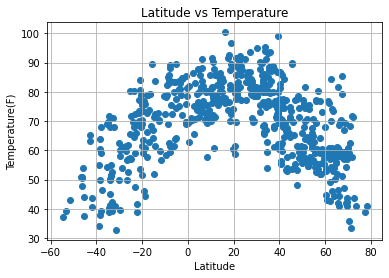

In [32]:
#Activity 2-5

plt.scatter(city_weather_df["Latitude"], city_weather_df["Temperature"])

plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")

plt.grid(True)

#save the figure
plt.savefig("Latitude vs Temp.png")

plt.show()

## Latitude vs. Humidity Plot

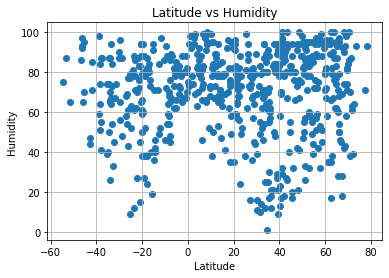

In [28]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity"])

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(True)

#save the figure
plt.savefig("Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

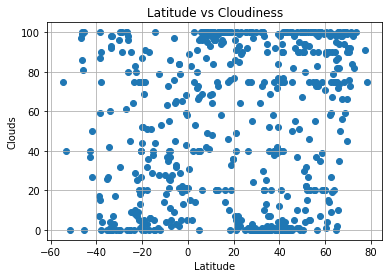

In [29]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Clouds"])

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Clouds")

plt.grid(True)

#save the figure
plt.savefig("Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

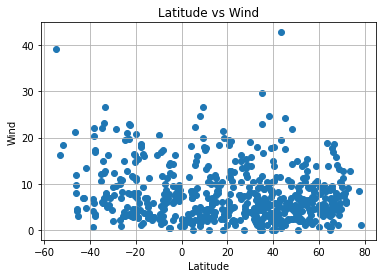

In [31]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind"])

plt.title("Latitude vs Wind")
plt.xlabel("Latitude")
plt.ylabel("Wind")

plt.grid(True)

#save the figure
plt.savefig("Latitude vs Wind Speed.png")

plt.show()

## Linear Regression

In [ ]:
# activity 2-7

# # Perform a linear regression on temperature vs. latitude
# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# # Get regression values
# regress_values = x_values * slope + intercept
# print(regress_values)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression